# Practical exam

In [2]:
### Please state your name here:
'Ovidiu Mesesan'

'Ovidiu Mesesan'

In [3]:
# make sure requirements are up to date
%pip install --upgrade pip >> results/requirements_log.txt
%pip install -r ../requirements.txt >> results/requirements_log.txt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 1.

Given the below snippet, add the necessary code lines in function f2 in order to obtain the expected output:

In [306]:
dict = {}
def f2(n):
    for i in range(1, n):
        print(f"~~~ {i}")

        dict.update({'cubed': i**i})
        dict.update({'squared': i*i})
    return dict.items()


        # dict['cubed'].append(i**i)
        # dict['squared'].append(i*i)
        
        # print(dict(zip('cubed',int(i*i))))
        
        # print({f"'cubed': {int(i)}**{int(i)}"})
        # print({f"'squared': {int(i)}*{int(i)}"})




n = 5
for x in f2(n):
    print(x)

~~~ 1
~~~ 2
~~~ 3
~~~ 4
('cubed', 256)
('squared', 16)


Expected output:

```
~~~ 1
{'cubed': 1}
{'squared': 1}
@@@ 1
~~~ 2
{'cubed': 8}
{'squared': 4}
@@@ 2
~~~ 3
{'cubed': 27}
{'squared': 9}
@@@ 3
~~~ 4
{'cubed': 64}
{'squared': 16}
@@@ 4
```

### 2.

Under **resources**, there are two input files, [input_file_1.csv](/2022/python_workshop/notebooks/resources/input_file_1.csv) and [input_file_2.csv](/2022/python_workshop/notebooks/resources/input_file_2.csv).

Given the two input files, remove the duplicates.

If rows in all files are combined, there must be NO duplicates. Solution should include 2 functions, one for reading data from files and one for writing data to files. A partial solution without functions is accepted.

Expected output: two separate output files under results/expected, [output_file_1.csv](/2022/python_workshop/notebooks/results/expected/output_file_1.csv) and [output_file_2.csv](/2022/python_workshop/notebooks/results/expected/output_file_2.csv).

In [181]:
import pandas as pd
df1 = pd.read_csv('./resources/input_file_1.csv')
df2 = pd.read_csv('./resources/input_file_2.csv')
df3 = pd.concat([df1, df2]).drop_duplicates()
df1 = df3[0:2]
df2 = df3[2:]
df1.to_csv('./resources/output_file_1.csv', index=False)
df2.to_csv('./resources/output_file_2.csv', index=False)

### 3.

Using the [data.gov.ro](https://data.gov.ro/dataset/acreditarea-unitatilor-sanitare-2021) API, extract the "accredited hospitals 2021" data set (link available below).

Alternatively, if the API is down, use the backup file **hospitals.csv** from the **resources** folder as a source.

In [270]:
import requests
import pandas as pd

In [271]:
# url_hospitals = 'https://data.gov.ro/dataset/4197b53e-7c91-4fcc-be07-883076d40ffc/resource/7a343719-d625-4b5c-98b5-895a684d61c4/download/anmcs-acreditare-unitati-sanitare-dec2021.json'


hospitals = pd.read_csv('./resources/hospital.csv')

hospitals.head()

,Unnamed: 0,Nr. Crt.,Nume,Cod A.N.M.C.S.,Judet,Clasificare,TIP USP (in functie de specificul patologiei tratate),TIP USP (in functie de regimul proprietatii),TIP USP (din punct de vedere al invatamantului si al cercetarii stiintifice medicale),Adresa completa a sediului principal,Adresa email oficiala,Website,Autoritatea tutelara,Acreditare ciclul I,Acreditare ciclul II,Unnamed: 15,__1,__2
0,0,1.0,SPITALUL MUNICIPAL CALAFAT,A001,Dolj,IV,general,public,fara invatamant,"B-dul. T. Vladimirescu, Nr. 24, Calafat, cod 2...",spitalcalafat@gmail.com,spitalcalafat.ro,PRIMARIA MUNICIPIULUI CALAFAT,Acreditat,Categoria V Decizie de prelungire a procesului...,NaN,NaN,NaN
1,1,2.0,SPITALUL DE PSIHIATRIE CRONICI SCHITU GRECI,A002,Olt,V,afectiuni cronice,public,fara invatamant,SLATINA STR. A. I. CUZA NR. 14,spitalulschitu@gmail.com,www.spitalul-schitu.ro,CONSILIUL JUDETEAN OLT,Acreditat,Categoria V Decizie de prelungire a procesului...,NaN,NaN,NaN
2,2,3.0,SPITALUL CLINIC NICOLAE MALAXA,A003,Bucuresti,III,general,public,clinic cu sectii universitare,"STR. DIMITRIE CANTEMIR, NR.1, PARTER, SECT.4, ...",secretariat@spitalmalaxa.ro,www.spitalmalaxa.ro,ASSMB,Acreditat,Categoria IV Acreditat cu incredere redusa,NaN,NaN,NaN
3,3,4.0,"SPITALUL MILITAR DE URGENTA ""REGINA MARIA"" BRA?OV",A004,Brasov,III,urgenta,public,fara invatamant,"Bucuresti, Str. Institutul Medico-Militar, Nr....",smureginamaria@rdsbv.ro,www.smubrasov.ro,DIRECtIA MEDICALa a Ministerului Apararii Nati...,Acreditat,Categoria II Acreditat cu recomandari,NaN,NaN,NaN
4,4,5.0,SPITALUL ORASENESC INEU,A005,Arad,IV,general,public,fara invatamant,"Calea Republicii, nr. 5",spitalineu@yahoo.ro,http://www.spitalineu.ro,Primaria Orasului Ineu,Acreditat,Categoria V Decizie de prelungire a procesului...,NaN,NaN,NaN


How many rows are in this dataset?

In [272]:
hospitals['Nume'].count()

762

What are the columns in this dataset?

In [273]:
hospitals.columns

Index(['Unnamed: 0', 'Nr. Crt.', 'Nume', 'Cod A.N.M.C.S.', 'Judet',
       'Clasificare', 'TIP USP (in functie de specificul patologiei tratate)',
       'TIP USP (in functie de regimul proprietatii)',
       'TIP USP (din punct de vedere al invatamantului si al cercetarii stiintifice medicale)',
       'Adresa completa a sediului principal', 'Adresa email oficiala',
       'Website', 'Autoritatea tutelara', 'Acreditare ciclul I',
       'Acreditare ciclul II', 'Unnamed: 15', '__1', '__2'],
      dtype='object')

Drop the unnecessary columns:
* Nr. Crt.
* TIP USP (din punct de vedere al invatamantului si al cercetarii stiintifice medicale)
* the last three columns

In [274]:
hospitals = hospitals.drop(['Nr. Crt.', 'TIP USP (din punct de vedere al invatamantului si al cercetarii stiintifice medicale)'], axis=1)
hospitals.drop(columns=hospitals.columns[-3:], axis=1, inplace=True)

Apply the following transformations to the columns, so that they are easier to work with:
* lowercase all columns
* `TIP USP (in functie de specificul patologiei tratate)` rename to `tip_patologie`
* `TIP USP (in functie de regimul proprietatii)` rename to `tip`
* `Adresa completa a sediului principal` rename to `adresa`
* `Adresa email oficiala` rename to `email`
* `Autoritatea tutelara` rename to `autoritate_tutelara`
* `Acreditare ciclul I` rename to `acreditare_i`
* `Acreditare ciclul II` rename to `acreditare_ii`

In [275]:


hospitals = hospitals.rename(
    columns={
        'TIP USP (in functie de specificul patologiei tratate)': 'tip_patologie',
        'TIP USP (in functie de regimul proprietatii)': 'tip',
        'Adresa completa a sediului principal': 'adresa',
        'Adresa email oficiala': 'email',
        'Autoritatea tutelara': 'autoritate_tutelara',
        'Acreditare ciclul I': 'acreditare_i',
        'Acreditare ciclul II': 'acreditare_ii'
    })
hospitals.columns = hospitals.columns.str.lower()



The total number of hospitals in this dataset is 762, however the actual number of rows is greater than that.

Identify and remove the empty (blank space) rows.

In [276]:
hospitals = hospitals.dropna(axis=0, how='any')
hospitals

,unnamed: 0,nume,cod a.n.m.c.s.,judet,clasificare,tip_patologie,tip,adresa,email,website,autoritate_tutelara,acreditare_i,acreditare_ii
0,0,SPITALUL MUNICIPAL CALAFAT,A001,Dolj,IV,general,public,"B-dul. T. Vladimirescu, Nr. 24, Calafat, cod 2...",spitalcalafat@gmail.com,spitalcalafat.ro,PRIMARIA MUNICIPIULUI CALAFAT,Acreditat,Categoria V Decizie de prelungire a procesului...
1,1,SPITALUL DE PSIHIATRIE CRONICI SCHITU GRECI,A002,Olt,V,afectiuni cronice,public,SLATINA STR. A. I. CUZA NR. 14,spitalulschitu@gmail.com,www.spitalul-schitu.ro,CONSILIUL JUDETEAN OLT,Acreditat,Categoria V Decizie de prelungire a procesului...
2,2,SPITALUL CLINIC NICOLAE MALAXA,A003,Bucuresti,III,general,public,"STR. DIMITRIE CANTEMIR, NR.1, PARTER, SECT.4, ...",secretariat@spitalmalaxa.ro,www.spitalmalaxa.ro,ASSMB,Acreditat,Categoria IV Acreditat cu incredere redusa
3,3,"SPITALUL MILITAR DE URGENTA ""REGINA MARIA"" BRA?OV",A004,Brasov,III,urgenta,public,"Bucuresti, Str. Institutul Medico-Militar, Nr....",smureginamaria@rdsbv.ro,www.smubrasov.ro,DIRECtIA MEDICALa a Ministerului Apararii Nati...,Acreditat,Categoria II Acreditat cu recomandari
4,4,SPITALUL ORASENESC INEU,A005,Arad,IV,general,public,"Calea Republicii, nr. 5",spitalineu@yahoo.ro,http://www.spitalineu.ro,Primaria Orasului Ineu,Acreditat,Categoria V Decizie de prelungire a procesului...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,757,CENTRUL MEDICAL ONCOHELP SRL,B399,Arad,V,specialitate,privat,"Arad, str. Andrei Saguna nr.12",oncohelparad@gmail.com,oncohelparad.ro,privat,-,Unitate aflata in proces de acreditare
758,758,SC MATER ANIMA SRL,B400,Suceava,Neclasificat,specialitate,privat,"Ipotesti, str. Stefan cel Mare 1079, jud Suceava",office@clinica-heredita.ro,www.clinica-hereditas.ro,privat,-,Unitate aflata in proces de acreditare
759,759,POPMED SERV SRL,B401,Mures,Neclasificat,pentru bolnavi cu afectiuni cronice,privat,"REGHIN, STR. STEJARULUI, NR.3, JUD. MURES",popmedserv@yahoo.com,www.popmedserv.ro,SC POPMED SERV SRL,-,Unitate aflata in proces de acreditare
760,760,SPITALUL ORASENESC VICTORIA,B403,Brasov,Neclasificat,general,public,"Str.Baii nr.2, orasul Victoria, jud.Brasov",spitalulorasenescvictoria@yahoo.com,www.spitalulorasenescvictoria.ro,UNITATEA ADMINISTRATIV TERITORIALA VICTORIA,-,Unitate aflata in proces de acreditare


How many public hospitals and how many private hospitals are in this dataset?

In [277]:

hospitals[hospitals['tip'] == 'public'].count()['nume']
hospitals[hospitals['tip'] == 'privat'].count()['nume']




375

Inspect the values in the `acreditare_i` column + print them.

In [278]:
# hospitals.head()
print(set(hospitals['acreditare_i']))

{'Acreditat', 'Neacreditat', '-'}


Create a dataframe containing the hospitals that are *not* accredited.

In [279]:
# hospitals.head()
hospitals[hospitals['acreditare_i'] != 'Acreditat']

,unnamed: 0,nume,cod a.n.m.c.s.,judet,clasificare,tip_patologie,tip,adresa,email,website,autoritate_tutelara,acreditare_i,acreditare_ii
188,188,SOCIETATEA DR IRIMIA SRL,A50009,Arges,Neclasificat,general,privat,"PITESTI, str.Negru Voda, nr.3-5",infodririmia@yahoo.ro,www.dririmia.ro,SC DR.IRIMIA SRL,Neacreditat,Unitate aflata in proces de acreditare
214,214,SPITALUL ORASENESC FAUREI,A50035,Braila,V,general,public,"STR.REPUBLICII,NR.46",spit_or_faurei@yahoo.com,www.spitalfaurei.ro,CONSILIUL LOCAL FAUREI,Neacreditat,Categoria VI Neacreditat
424,424,S.C. MUNTENIA MEDICAL COMPETENCES S.A,B001,Arges,V,general,privat,"Arges, Pitesti, Str. Pictor N Grigorescu nr. 2 A",office@munteniahospital.ro,www.munteniahospital.ro,Muntenia Medical Competences S.A,-,Categoria II Acreditat cu recomandari
425,425,SPITALUL MUNICIPAL CODLEA,B002,Brasov,V,general,public,"CODLEA, STR. LUNGA NR. 33",spitalulcodlea@yahoo.com,www.spitalulcodlea.ro,CONSILIUL LOCAL CODLEA,-,Categoria III Acreditat cu rezerve
426,426,SOCIETATEA CENTRUL MEDICAL POLICLINICO DI MONZ...,B004,Bucuresti,V,general,privat,str. Tony Bulandra nr.27,secretariat@spitalulmonza.ro,www.spitalulmonza.ro,SC CENTRUL MEDICAL POLICLINICO DI MONZA SRL,-,Categoria II Acreditat cu recomandari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,757,CENTRUL MEDICAL ONCOHELP SRL,B399,Arad,V,specialitate,privat,"Arad, str. Andrei Saguna nr.12",oncohelparad@gmail.com,oncohelparad.ro,privat,-,Unitate aflata in proces de acreditare
758,758,SC MATER ANIMA SRL,B400,Suceava,Neclasificat,specialitate,privat,"Ipotesti, str. Stefan cel Mare 1079, jud Suceava",office@clinica-heredita.ro,www.clinica-hereditas.ro,privat,-,Unitate aflata in proces de acreditare
759,759,POPMED SERV SRL,B401,Mures,Neclasificat,pentru bolnavi cu afectiuni cronice,privat,"REGHIN, STR. STEJARULUI, NR.3, JUD. MURES",popmedserv@yahoo.com,www.popmedserv.ro,SC POPMED SERV SRL,-,Unitate aflata in proces de acreditare
760,760,SPITALUL ORASENESC VICTORIA,B403,Brasov,Neclasificat,general,public,"Str.Baii nr.2, orasul Victoria, jud.Brasov",spitalulorasenescvictoria@yahoo.com,www.spitalulorasenescvictoria.ro,UNITATEA ADMINISTRATIV TERITORIALA VICTORIA,-,Unitate aflata in proces de acreditare


How many hospitals are *not* accredited?

In [280]:
# hospitals.head()

hospitals[hospitals['acreditare_i'] == 'Neacreditat'].count()['nume']


2

Pick a county (judet) for a more in-depth analysis.
(Bucuresti is also a county)

In [281]:
judet = 'Maramures'
# hospitals.head()

According to this dataset, how many hospitals are in this county?

In [282]:
hospitals[hospitals['judet'] == judet].count()['nume']

17

For the chosen county, create a Dataframe that contains the following information:
* judet
* tip (public, privat)
* count of unaccredited hospitals
* count of accredited hospitals

In [283]:

hospitals_judet = hospitals[(hospitals['judet'] == judet)]
hospitals_judet['count_of_accredited'] = hospitals_judet['acreditare_i'] == 'Acreditat'
hospitals_judet['count_of_unaccredited'] = hospitals_judet['acreditare_i'].isin(['Neacreditat','-'])

hospitals_judet['count_of_accredited'].replace(to_replace=False, value= 0, inplace= True)
hospitals_judet['count_of_accredited'].replace(to_replace=True, value= 1, inplace= True)
hospitals_judet['count_of_unaccredited'].replace(to_replace=False, value= 0, inplace= True)
hospitals_judet['count_of_unaccredited'].replace(to_replace=True, value= 1, inplace= True)

stat = hospitals_judet[['judet','tip','count_of_accredited','count_of_unaccredited']]
stat




C:\Users\Laptop 13\AppData\Local\Temp\ipykernel_720\1906050263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitals_judet['count_of_accredited'] = hospitals_judet['acreditare_i'] == 'Acreditat'
C:\Users\Laptop 13\AppData\Local\Temp\ipykernel_720\1906050263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitals_judet['count_of_unaccredited'] = hospitals_judet['acreditare_i'].isin(['Neacreditat','-'])
C:\Users\Laptop 13\AppData\Local\Temp\ipykernel_720\1906050263.py:5: SettingWithCopyWarning: 

,judet,tip,count_of_accredited,count_of_unaccredited
110,Maramures,public,1,0
111,Maramures,public,1,0
170,Maramures,public,1,0
177,Maramures,public,1,0
304,Maramures,public,1,0
305,Maramures,public,1,0
370,Maramures,privat,1,0
384,Maramures,public,1,0
391,Maramures,public,1,0
442,Maramures,privat,0,1


Create a plot that highlights
* the number of accredited public hospitals
* the number of accredited private hospitals
* the number of unaccredited public hospitals
* the number of unaccredited private hospitals

The expected output for Bucuresti can be found  [here](/2022/python_workshop/notebooks/results/expected/output_test.png).

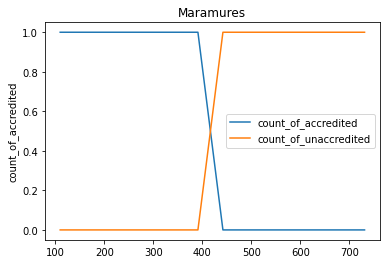

In [284]:
plot_acreditat = stat.plot(title=f"{judet}", ylabel="count_of_accredited")



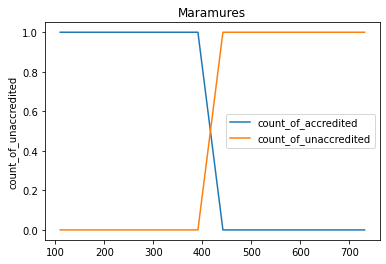

In [285]:
plot_neacreditat = stat.plot(title=f"{judet}", ylabel="count_of_unaccredited")

In [286]:
plot_data = reduce(lambda  left,right: pd.merge(left,right,on=["judet"], how='inner'))

plot_data.head()

NameError: name 'reduce' is not defined

In [ ]:
plot_data.plot(kind="bar")